## This notebook will discover the different analysis for time series data. 
### For this illustation we will use economic and business data of Bangladesh

In [24]:
# Import modules
import pandas as pd
import numpy as np
import seaborn as sns
from pymongo import MongoClient
from decouple import config
from matplotlib import pyplot as plt

### Connection to database. For this we used mongodb database.
### But you can use any sql or no sql database

In [13]:
MONGO_DETAILS = config('MONGO_DETAILS')
port = 8000
client = MongoClient(MONGO_DETAILS, port)
db = client["DATATERMINAL"]

ED = db.get_collection('Economic Dashboard')
BD = db.get_collection('Business Dashboard')
ID = db.get_collection('Industry Dashboard')

## Analysis of the Economic data of Bangladesh
#### We will see different plots and will analysis the plots

In [14]:
#Converting the database to dataframe
#Then we will analyze the data
ED = ED.find()
ED = pd.DataFrame(ED)
ED.drop('_id', inplace=True, axis=1)

ED.head()

,Calendar Year,Budget Year,Indicator,Source,Calendar Value,Budget Value,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Unit
0,NaN,2018-2019,Account Balance,Bangladesh Bank,NaN,-5.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Billion USD
1,NaN,2017-2018,Account Balance,Bangladesh Bank,NaN,-9.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Billion USD
2,NaN,2016-2017,Account Balance,Bangladesh Bank,NaN,-1.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Billion USD
3,NaN,2015-2016,Account Balance,Bangladesh Bank,NaN,4.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Billion USD
4,NaN,2014-2015,Account Balance,Bangladesh Bank,NaN,3.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Billion USD


In [19]:
ECalenderData = ED[~ED['Calendar Value'].isnull()]
EBudgetData = ED[~ED['Budget Year'].isnull()]
EMonthlyData = ED[~ED['Calendar Year'].isnull() & ED['Calendar Value'].isnull()]

### As now i have all the collection in correct format we can analyse and visualize the data

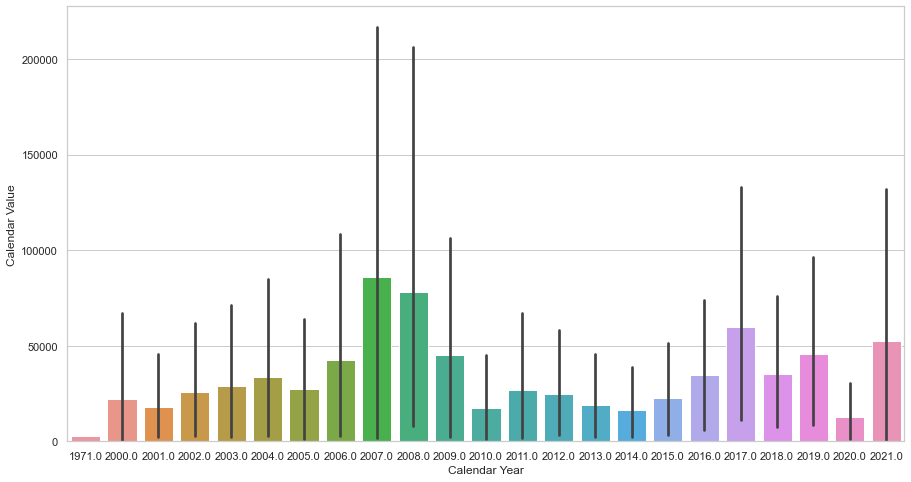

In [25]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Calendar Year", y="Calendar Value", data=ECalenderData)

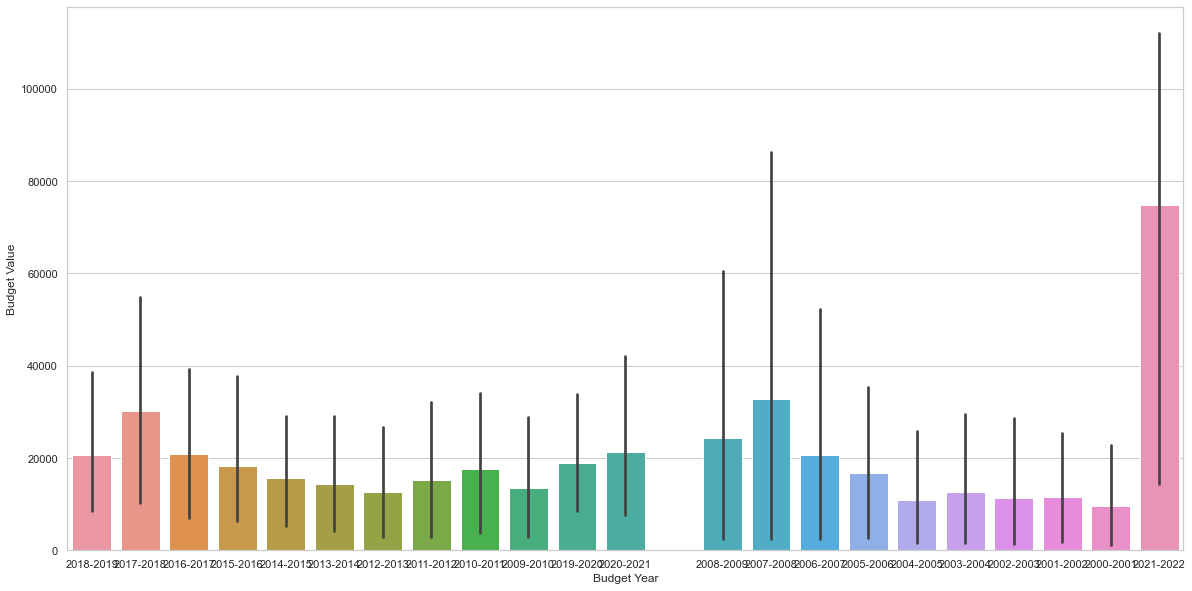

In [31]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Budget Year", y="Budget Value", data=EBudgetData)

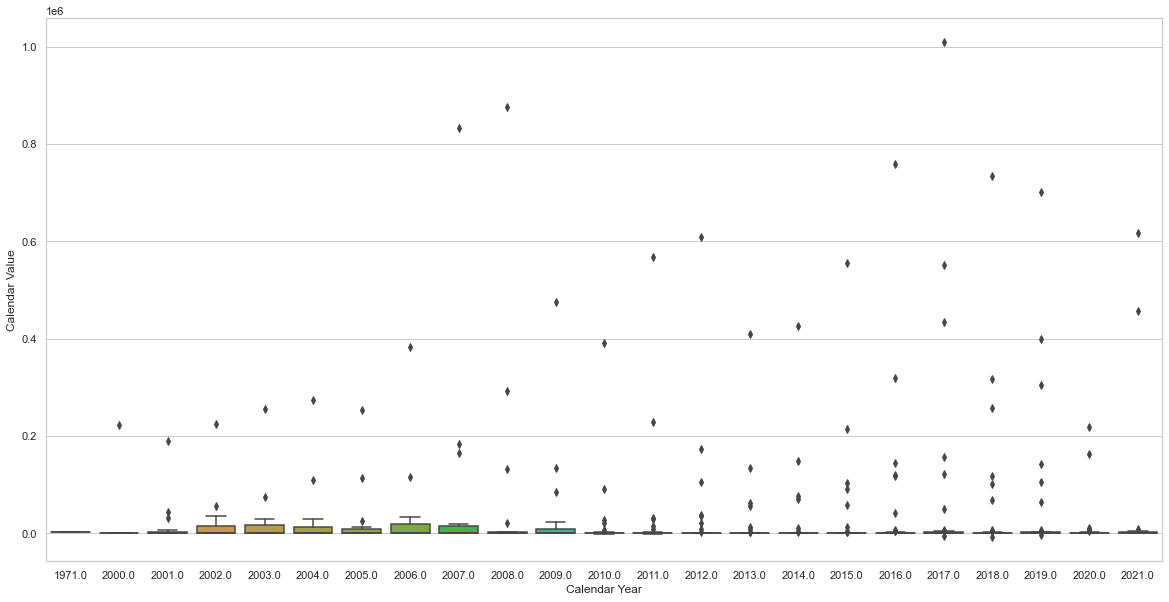

In [30]:
plt.figure(figsize=(20, 10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Calendar Year", y="Calendar Value", data=ECalenderData)

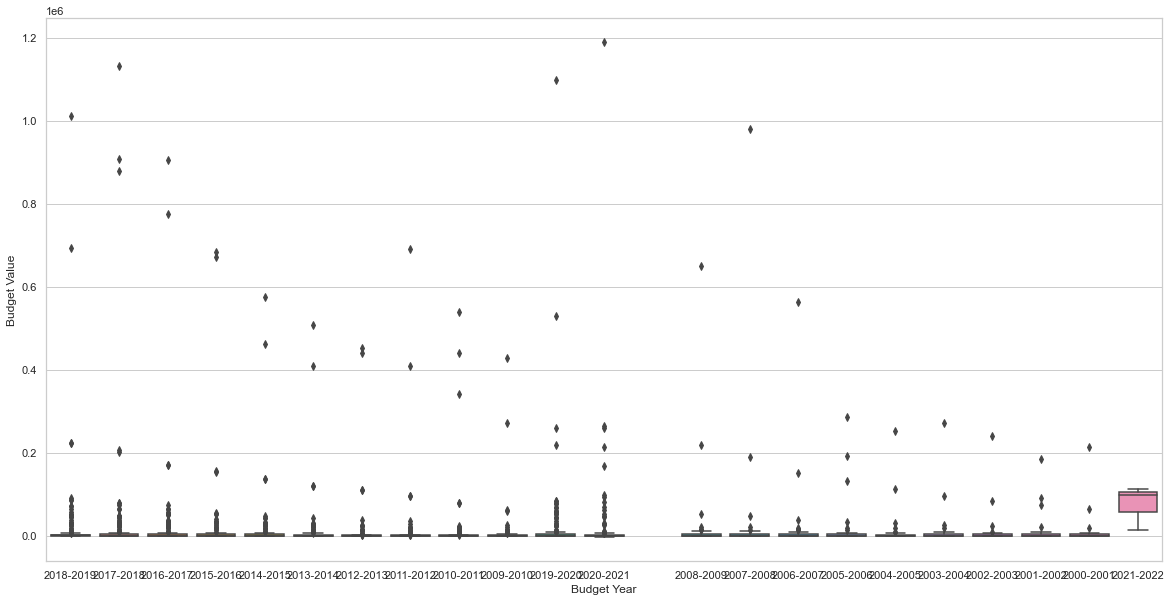

In [32]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Budget Year", y="Budget Value", data=EBudgetData)

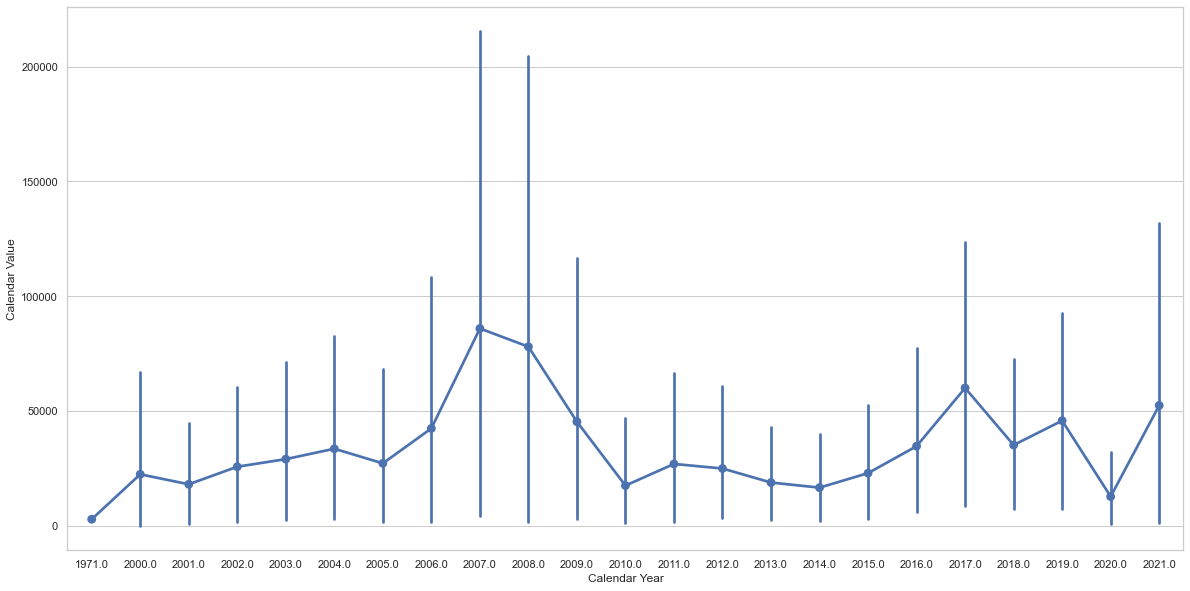

In [42]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
g = sns.pointplot(x="Calendar Year", y="Calendar Value", kind="line", data=ECalenderData)

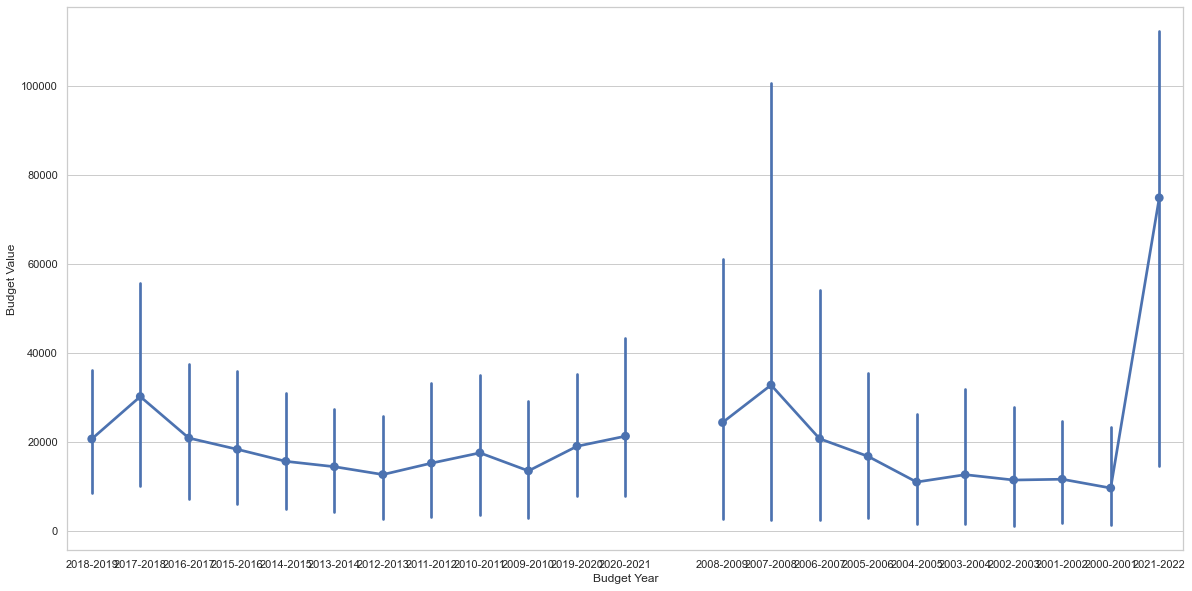

In [44]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
g = sns.pointplot(x="Budget Year", y="Budget Value", kind="line", data=EBudgetData)